## Antibody neutralization assays for luciferase pseudovirus expressing unmutated Pasteur rabies G

Authored by Arjun Aditham. This notebook analyzes data and plots neutralization curves against multiple antibodies for luciferase pseudovirus expressing unmutated Pasteur rabies G. Note that this notebook has a dependency on a data file in 'RawData'

Files required in 'RawData' directory:
- 231014_RabiesPV_Neuts_Formatted.csv

In [1]:
import pandas as pd
from matplotlib import pyplot as pl
#import seaborn as sb
import numpy as np
import matplotlib.cm as cm
import scipy.stats
from matplotlib.colors import ListedColormap

In [2]:
import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

pd.set_option('display.float_format', '{:.3g}'.format)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 500)

In [3]:
import os
import yaml

import neutcurve.parse_excel

In [4]:
data = pd.read_csv('RawData/231014_RabiesPV_Neuts_Formatted.csv')

In [5]:
subset=['RVC58','CR4098','RVC68','CR57','RVA122'];

data=data[data['serum'].isin(subset)==True]

In [6]:
data.drop(columns=['Unnamed: 0'])


,virus,serum,fraction infectivity,concentration,replicate
0,PV,RVC58,0,1e+03,3
1,PV,RVC58,0,200,3
2,PV,RVC58,2.21e-05,40,3
3,PV,RVC58,-3.32e-05,8,3
4,PV,RVC58,0.0791,1.6,3
...,...,...,...,...,...
123,PV,CR4098,0.777,1.6,10
124,PV,CR4098,0.87,0.32,10
125,PV,CR4098,0.832,0.064,10
126,PV,CR4098,1.09,0.0128,10


In [7]:
fits = neutcurve.CurveFits(data,fixtop=True)

In [8]:
fits.fitParams(ics=(50,90,99))

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,...,ic99_bound,ic99_str,midpoint,midpoint_bound,midpoint_bound_type,slope,top,bottom,r2,rmsd
0,RVC58,PV,average,2,0.275,interpolated,0.275,3.18,interpolated,3.18,...,interpolated,46,0.275,0.275,interpolated,0.897,1,0,0.975,0.0558
1,RVA122,PV,average,2,0.308,interpolated,0.308,3.77,interpolated,3.77,...,interpolated,58,0.308,0.308,interpolated,0.878,1,0,0.991,0.0362
2,CR57,PV,average,2,0.546,interpolated,0.546,3.05,interpolated,3.05,...,interpolated,19.9,0.546,0.546,interpolated,1.28,1,0,0.996,0.0247
3,RVC68,PV,average,2,7.62,interpolated,7.62,1e+03,lower,>1e+03,...,lower,>1e+03,7.62,7.62,interpolated,0.378,1,0,0.867,0.106
4,CR4098,PV,average,2,3.76,interpolated,3.76,30.7,interpolated,30.7,...,lower,>200,3.76,3.76,interpolated,1.05,1,0,0.854,0.136


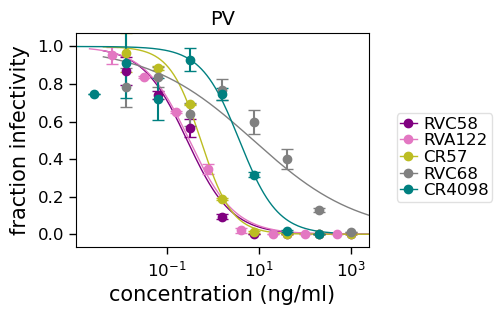

In [9]:
fig, axes = fits.plotViruses(xlabel='concentration (ng/ml)',
                             serum_to_color_marker={"RVC58": ("purple", "o"), "RVA122": ("#e377c2", "o"),
                                                   "CR57": ("#bcbd22", "o"), "RVC68": ("gray", "o"),'CR4098':('teal','o')})

#suppress output
#fig.savefig('231014_NeutCurves.svg');

In [11]:
fits_fixtop = neutcurve.CurveFits(data)

In [12]:
fits_fixtop.fitParams(ics=(50,90,99))

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,...,ic99_bound,ic99_str,midpoint,midpoint_bound,midpoint_bound_type,slope,top,bottom,r2,rmsd
0,RVC58,PV,average,2,0.275,interpolated,0.275,3.18,interpolated,3.18,...,interpolated,46,0.275,0.275,interpolated,0.897,1,0,0.975,0.0558
1,RVA122,PV,average,2,0.308,interpolated,0.308,3.77,interpolated,3.77,...,interpolated,58,0.308,0.308,interpolated,0.878,1,0,0.991,0.0362
2,CR57,PV,average,2,0.546,interpolated,0.546,3.05,interpolated,3.05,...,interpolated,19.9,0.546,0.546,interpolated,1.28,1,0,0.996,0.0247
3,RVC68,PV,average,2,7.62,interpolated,7.62,1e+03,lower,>1e+03,...,lower,>1e+03,7.62,7.62,interpolated,0.378,1,0,0.867,0.106
4,CR4098,PV,average,2,3.76,interpolated,3.76,30.7,interpolated,30.7,...,lower,>200,3.76,3.76,interpolated,1.05,1,0,0.854,0.136


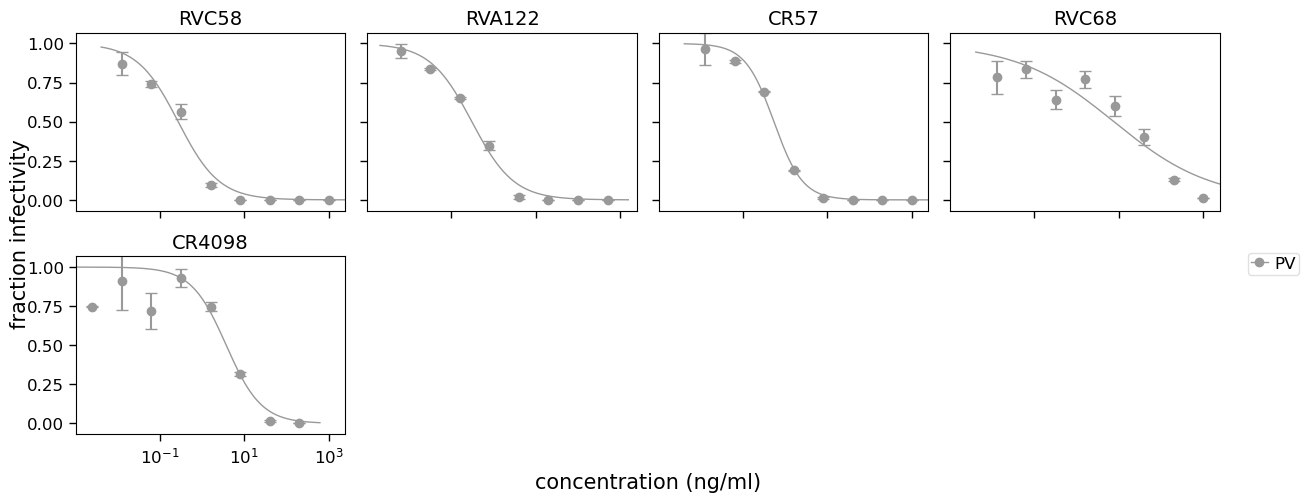

In [13]:
fig, axes = fits_fixtop.plotSera(xlabel='concentration (ng/ml)')

#we only had a used of curves from this as many did not neutralize.